In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import pickle

In [134]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [135]:
x = data.drop(['AgeCategory', 'Race', 'HeartDisease'], axis=1)


In [136]:
y = data['HeartDisease']

In [137]:
data_fs = pd.concat([x,y], axis=1)
data_fs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,Yes,Very good,5.0,Yes,No,Yes,No
1,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,Very good,7.0,No,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,Yes,Fair,8.0,Yes,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,No,No,Good,6.0,No,No,Yes,No
4,23.71,No,No,No,28.0,0.0,Yes,Female,No,Yes,Very good,8.0,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,Yes,No,Fair,6.0,Yes,No,No,Yes
319791,29.84,Yes,No,No,0.0,0.0,No,Male,No,Yes,Very good,5.0,Yes,No,No,No
319792,24.24,No,No,No,0.0,0.0,No,Female,No,Yes,Good,6.0,No,No,No,No
319793,32.81,No,No,No,0.0,0.0,No,Female,No,No,Good,12.0,No,No,No,No


In [138]:
le = preprocessing.LabelEncoder()

In [139]:
feature_encode = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in feature_encode:
    data_fs[column] = le.fit_transform(data_fs[column])

In [140]:
data_fs['HeartDisease'] = le.fit_transform(data_fs['HeartDisease'])
data_fs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,0,2,1,4,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,0,1,4,7.0,0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,2,1,1,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,0,2,6.0,0,0,1,0
4,23.71,0,0,0,28.0,0.0,1,0,0,1,4,8.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,2,0,1,6.0,1,0,0,1
319791,29.84,1,0,0,0.0,0.0,0,1,0,1,4,5.0,1,0,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,0,1,2,6.0,0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,0,0,2,12.0,0,0,0,0


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

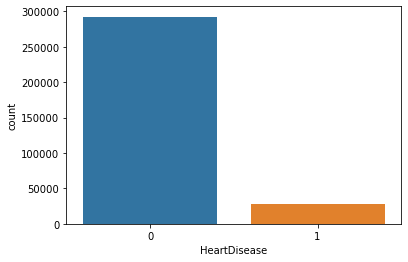

In [141]:
sns.countplot(x=data_fs['HeartDisease'], data=data_fs)

In [142]:
data_fs = data_fs.drop(['BMI', 'AlcoholDrinking', 'MentalHealth', 'GenHealth', 'SleepTime', 'Asthma'], axis=1)

In [143]:
data_fs = data_fs.sample(frac=1, random_state=42)

In [144]:
data_fs

,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,KidneyDisease,SkinCancer,HeartDisease
271884,1,0,0.0,0,0,0,1,0,0,0
270361,0,0,0.0,0,0,0,1,0,1,0
219060,1,0,0.0,0,0,0,1,0,0,0
24010,0,0,30.0,0,0,0,0,0,0,0
181930,1,0,30.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
119879,0,0,0.0,0,1,0,0,0,0,0
259178,1,0,0.0,0,1,0,1,0,0,0
131932,1,0,12.0,0,1,1,0,0,0,0
146867,0,0,7.0,0,0,0,1,0,0,0


In [145]:
x = data_fs.iloc[:, 0:9]

In [146]:
y = data_fs.iloc[:, 9]

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
smote = SMOTE(random_state=42)

In [149]:
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [150]:
x_train_oversampled

,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,KidneyDisease,SkinCancer
0,1,1,0.0,0,1,2,1,0,0
1,0,0,0.0,0,1,0,0,0,0
2,0,0,0.0,0,1,0,1,0,0
3,0,0,0.0,0,1,0,1,0,0
4,0,0,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
467867,1,0,0.0,1,0,2,0,0,1
467868,1,0,0.0,0,1,0,1,0,0
467869,0,0,2.0,1,1,0,1,0,0
467870,0,0,7.0,0,1,0,1,0,0


In [151]:
y_train_oversampled

0         0
1         0
2         0
3         0
4         0
         ..
467867    1
467868    1
467869    1
467870    1
467871    1
Name: HeartDisease, Length: 467872, dtype: int32

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

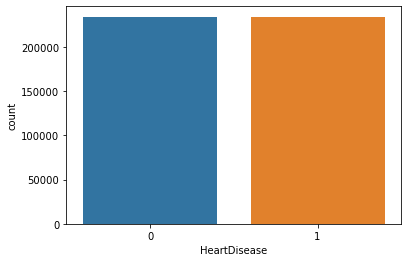

In [152]:
sns.countplot(x=y_train_oversampled, data=x_train_oversampled)

In [153]:
x_train_oversampled.values
y_train_oversampled.values
x_test.values
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
scaler = MinMaxScaler()

In [155]:
x_train_oversampled = scaler.fit_transform(x_train_oversampled)
x_test = scaler.fit_transform(x_test)

In [156]:
x_train_oversampled

array([[1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.23333333, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [157]:
x_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [158]:
y_train_oversampled = y_train_oversampled.values

In [159]:
y_train_oversampled

array([0, 0, 0, ..., 1, 1, 1])

In [160]:
y_test = y_test.values

In [161]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
def compare_classifiers(x_train, x_test, y_train, y_test):
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        #"SVM": SVC(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "Logistic Regression": LogisticRegression()
    }
    
    results = {}
    roc_results = {}
    
    for classifier_name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[classifier_name] = accuracy
        
        if hasattr(classifier, "predict_proba"):
            y_proba = classifier.predict_proba(x_test)
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
            roc_auc = auc(fpr, tpr)
            roc_results[classifier_name] = (fpr, tpr, roc_auc)
    
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    
    for classifier_name, accuracy in sorted_results:
        print(f"{classifier_name}: {accuracy}")
    
    plt.figure(figsize=(10, 6))
    classifiers_names, accuracies = zip(*sorted_results)
    plt.barh(classifiers_names, accuracies)
    plt.xlabel("Accuracy")
    plt.ylabel("Classifier")
    plt.title("Comparison of Classifiers")
    plt.savefig("under_classifier_comparison.png")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for classifier_name, (fpr, tpr, roc_auc) in roc_results.items():
        plt.plot(fpr, tpr, label=f"{classifier_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.savefig("under_roc_curve.png")
    plt.show()

K-Nearest Neighbors: 0.8986850951390735
Naive Bayes: 0.8059538141621977
Decision Tree: 0.7484325896277303
Random Forest: 0.747447583608249


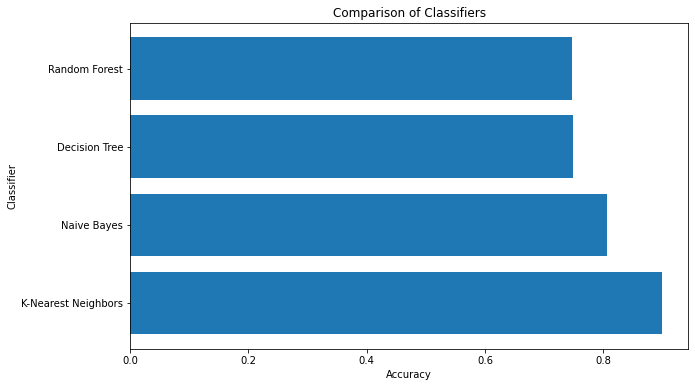

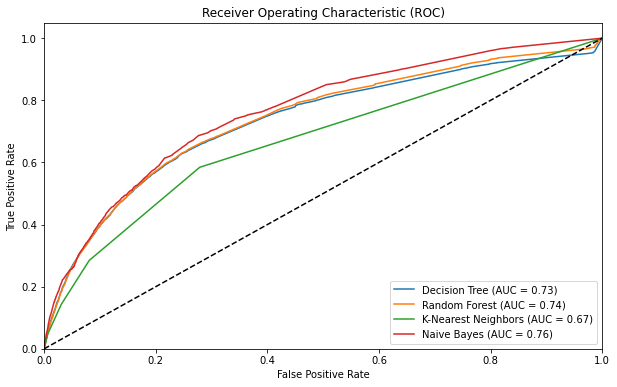

In [163]:
compare_classifiers(x_train_oversampled, x_test, y_train_oversampled, y_test)

In [164]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [165]:
knn_model.fit(x_train_oversampled, y_train_oversampled)

KNeighborsClassifier(n_neighbors=2)

In [166]:
y_pred = knn_model.predict(x_test)

In [167]:
accuracy_score(y_test, y_pred)

0.9010928876311387

In [177]:
from sklearn.metrics import classification_report

In [176]:
report = classification_report(y_test, y_pred)

In [178]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     58486
           1       0.23      0.53      0.32      5473

    accuracy                           0.81     63959
   macro avg       0.59      0.68      0.60     63959
weighted avg       0.89      0.81      0.84     63959



In [168]:
nb = GaussianNB()

In [169]:
nb.fit(x_train_oversampled, y_train_oversampled)

GaussianNB()

In [170]:
y_pred = nb.predict(x_test)

In [171]:
accuracy_score(y_test, y_pred)

0.8059538141621977

In [172]:
from sklearn.metrics import classification_report

In [173]:
report = classification_report(y_test, y_pred)

In [174]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     58486
           1       0.23      0.53      0.32      5473

    accuracy                           0.81     63959
   macro avg       0.59      0.68      0.60     63959
weighted avg       0.89      0.81      0.84     63959



In [175]:
with open('model2.pkl', 'wb') as file:
    pickle.dump(knn_model, file)